# CNN using Keras

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))
x_train = (x_train - mean_image)/(std+1e-7)
x_test = (x_test - mean_image)/(std+1e-7)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
model = Sequential()

# Convolution Layer followed by MaxPooling Layer
model.add(Conv2D(32, (3, 3), activation = "relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution Layer followed by MaxPooling Layer
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution Layer followed by MaxPooling Layer
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Two dense layers 
model.add(Flatten()) # Flatten the dataset
model.add(Dense(64, activation = "relu"))
model.add(Dense(10))

In [17]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)              

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_test,y_test),)

Epoch 1/50
1000/1000 [==============================] - 84s 84ms/step - loss: 1.4479 - accuracy: 0.4750 - val_loss: 1.2282 - val_accuracy: 0.5646
Epoch 2/50
1000/1000 [==============================] - 59s 59ms/step - loss: 1.0708 - accuracy: 0.6247 - val_loss: 0.9973 - val_accuracy: 0.6512
Epoch 3/50
1000/1000 [==============================] - 61s 61ms/step - loss: 0.9173 - accuracy: 0.6783 - val_loss: 0.9301 - val_accuracy: 0.6810
Epoch 4/50
1000/1000 [==============================] - 59s 59ms/step - loss: 0.8195 - accuracy: 0.7145 - val_loss: 0.8834 - val_accuracy: 0.6991
Epoch 5/50
1000/1000 [==============================] - 57s 57ms/step - loss: 0.7493 - accuracy: 0.7386 - val_loss: 0.8453 - val_accuracy: 0.7086
Epoch 6/50
1000/1000 [==============================] - 57s 57ms/step - loss: 0.6908 - accuracy: 0.7589 - val_loss: 0.9056 - val_accuracy: 0.7005
Epoch 7/50
1000/1000 [==============================] - 58s 58ms/step - loss: 0.6349 - accuracy: 0.7770 - val_loss: 0.8715 -

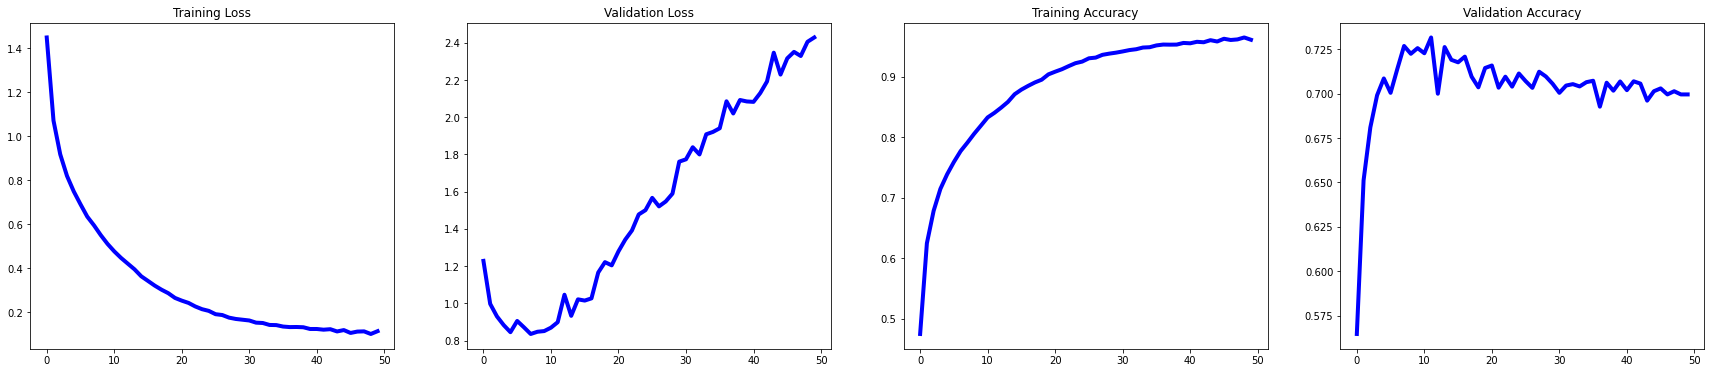

In [19]:
loss_history_4, val_loss_4, train_acc_history_4,val_acc_history_4 = (history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

fig,ax  = plt.subplots(1,5, sharex='all', sharey='all', figsize=(30,6))
items = {"Training Loss":loss_history_4, "Validation Loss":val_loss_4, "Training Accuracy":train_acc_history_4,"Validation Accuracy": val_acc_history_4}

graph = 1
for key in items.keys():
    plt.subplot(1,4,graph);plt.plot(items[key], color='#0000ff', linewidth=4)
    plt.title(key)
    graph+=1